# Tutorial: Normalisasi dan Standardisasi Data

Selamat datang di tutorial tentang normalisasi dan standardisasi data! Dalam tutorial ini, kita akan mempelajari berbagai teknik untuk mengubah skala data agar lebih sesuai untuk analisis dan pemodelan machine learning.

## Daftar Isi:
1. Pengenalan
   - Mengapa Perlu Normalisasi/Standardisasi?
   - Perbedaan Normalisasi dan Standardisasi
2. Import Library dan Persiapan Data
3. Teknik Normalisasi
   - Min-Max Scaling
   - Normalisasi L1/L2
4. Teknik Standardisasi
   - Z-Score Standardization
   - Robust Scaling
5. Perbandingan Metode
6. Studi Kasus
7. Latihan

Mari kita mulai!

## 1. Pengenalan

### Mengapa Perlu Normalisasi/Standardisasi?

Normalisasi dan standardisasi data sangat penting dalam machine learning karena:
1. **Skala yang Berbeda**: Fitur dengan skala yang berbeda dapat mempengaruhi performa model
2. **Konvergensi**: Membantu algoritma mencapai konvergensi lebih cepat
3. **Interpretasi**: Memudahkan interpretasi dan perbandingan antar fitur
4. **Menghindari Bias**: Mencegah fitur dengan nilai besar mendominasi perhitungan

### Perbedaan Normalisasi dan Standardisasi

- **Normalisasi**: Mengubah skala data ke range tertentu (biasanya [0,1])
- **Standardisasi**: Mengubah distribusi data sehingga memiliki mean=0 dan std=1

Statistik Deskriptif Data Awal:
--------------------------------------------------
       Tinggi   Berat  Pendapatan    Usia
count  100.00  100.00      100.00  100.00
mean   168.96   65.33    73856.45   30.68
std      9.08   14.31    37746.59    6.41
min    143.80   36.22    30724.90   13.01
25%    163.99   52.92    46263.60   25.51
50%    168.73   66.26    66623.62   30.40
75%    174.06   73.07    90549.24   35.00
max    188.52  105.80   216177.85   47.52


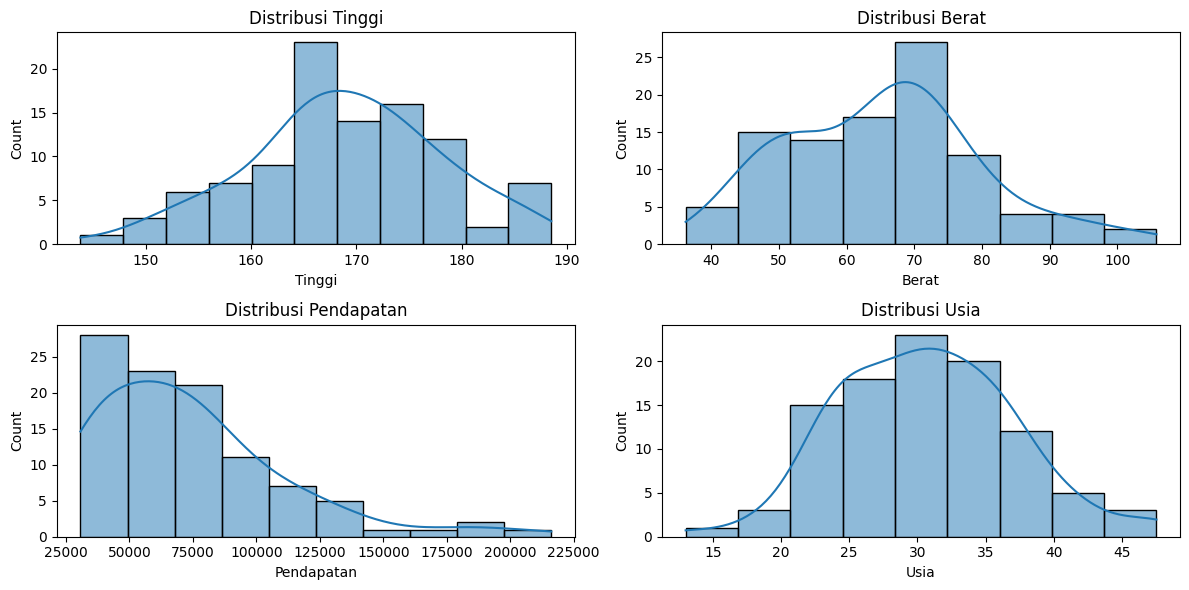

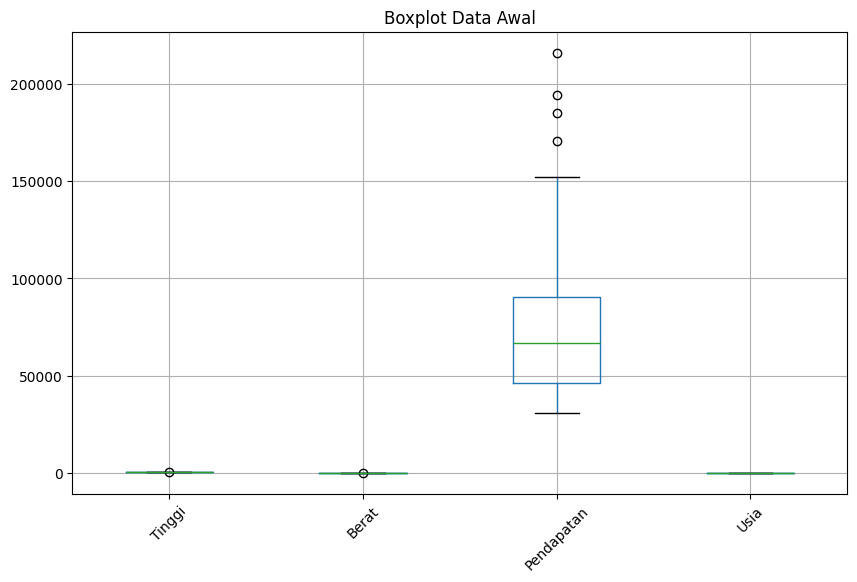

In [6]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    RobustScaler,
    Normalizer
)

# Set random seed untuk reproduktifitas
np.random.seed(42)

# Membuat dataset contoh
n_samples = 100
data = {
    'Tinggi': np.random.normal(170, 10, n_samples),  # dalam cm
    'Berat': np.random.normal(65, 15, n_samples),    # dalam kg
    'Pendapatan': np.random.exponential(50000, n_samples) + 30000,  # dalam ribuan
    'Usia': np.random.normal(30, 8, n_samples)       # dalam tahun
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Tampilkan statistik deskriptif
print("Statistik Deskriptif Data Awal:")
print("-" * 50)
print(df.describe().round(2))

# Visualisasi distribusi data awal
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

# Boxplot untuk melihat skala dan outlier
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot Data Awal')
plt.xticks(rotation=45)
plt.show()

## 2. Teknik Normalisasi

### Min-Max Scaling
Min-Max Scaling mengubah skala data ke range [0,1] dengan formula:
\[ X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}} \]

### Normalisasi L1/L2
- L1 Normalisasi (Manhattan): membagi setiap nilai dengan jumlah absolut semua nilai
- L2 Normalisasi (Euclidean): membagi setiap nilai dengan akar kuadrat dari jumlah kuadrat semua nilai

Mari kita implementasikan kedua teknik ini:

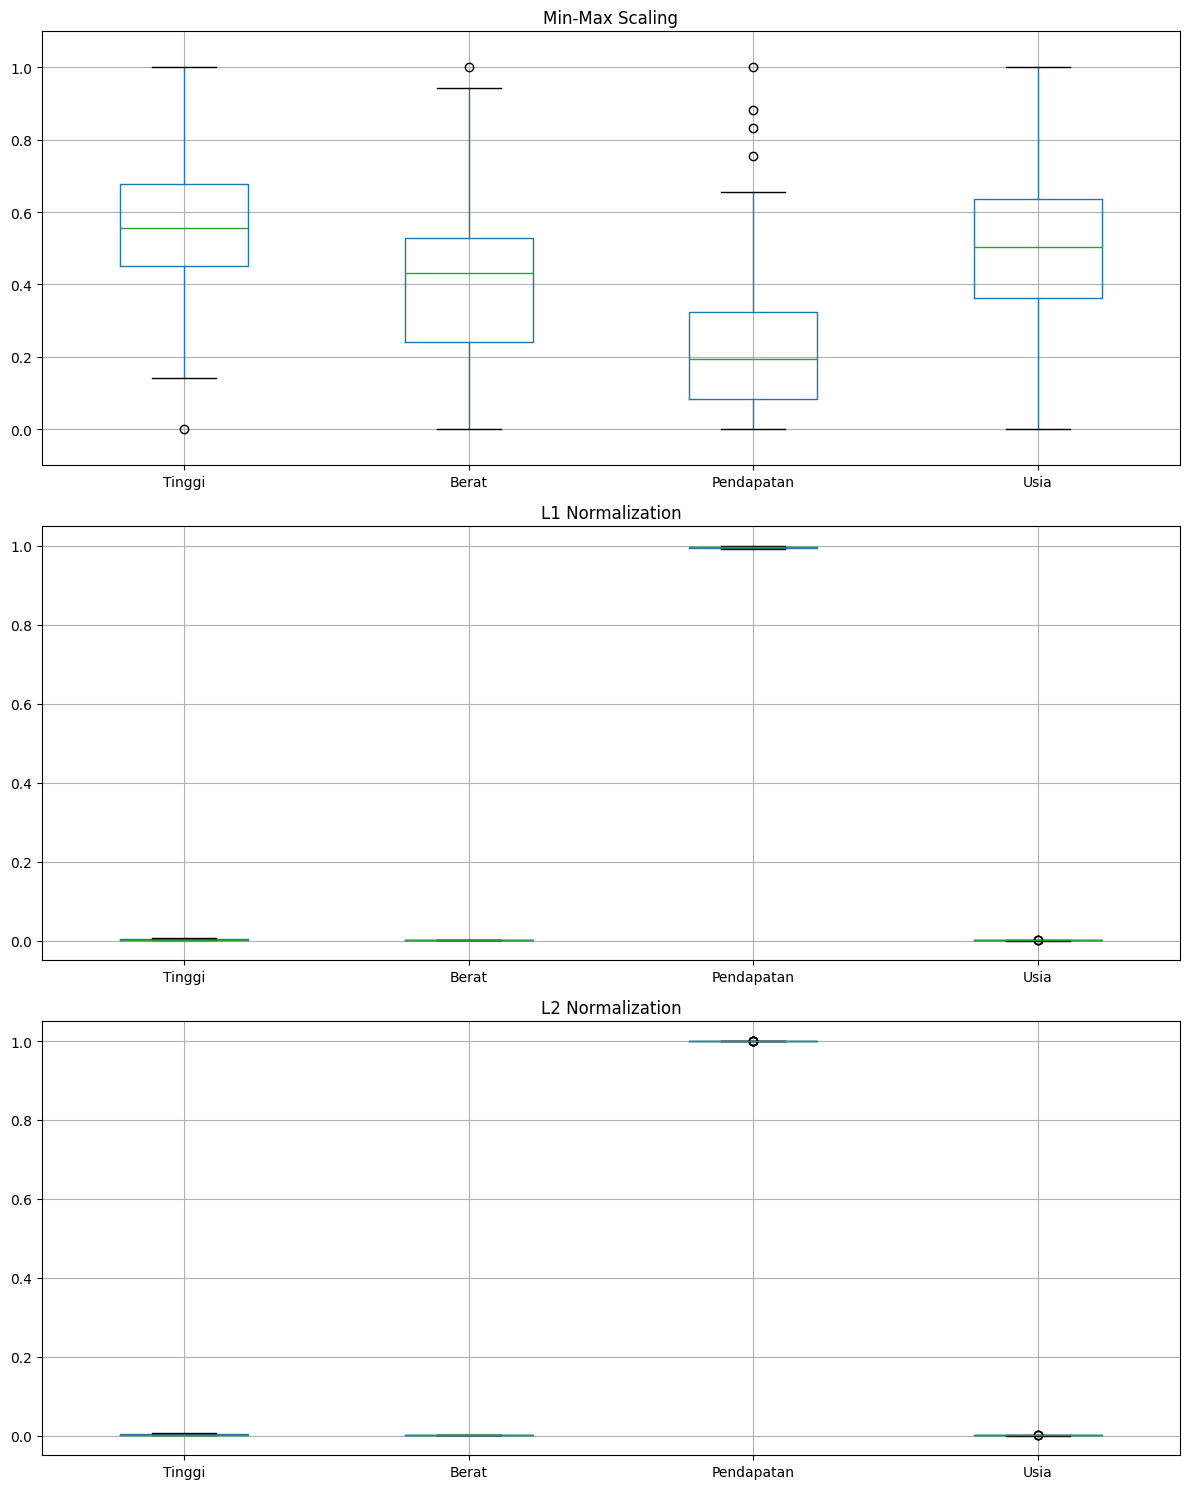


Statistik Deskriptif setelah Min-Max Scaling:
--------------------------------------------------
        Tinggi    Berat  Pendapatan     Usia
count  100.000  100.000     100.000  100.000
mean     0.563    0.418       0.233    0.512
std      0.203    0.206       0.204    0.186
min      0.000    0.000       0.000    0.000
25%      0.451    0.240       0.084    0.362
50%      0.557    0.432       0.194    0.504
75%      0.677    0.530       0.323    0.637
max      1.000    1.000       1.000    1.000

Statistik Deskriptif setelah L1 Normalization:
--------------------------------------------------
        Tinggi    Berat  Pendapatan     Usia
count  100.000  100.000     100.000  100.000
mean     0.003    0.001       0.996    0.001
std      0.001    0.001       0.002    0.000
min      0.001    0.000       0.991    0.000
25%      0.002    0.001       0.994    0.000
50%      0.003    0.001       0.996    0.000
75%      0.004    0.001       0.997    0.001
max      0.006    0.003       0.999   

In [7]:
# 1. Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df),
    columns=df.columns
)

# 2. L1/L2 Normalization
normalizer_l1 = Normalizer(norm='l1')
normalizer_l2 = Normalizer(norm='l2')

df_norm_l1 = pd.DataFrame(
    normalizer_l1.fit_transform(df),
    columns=df.columns
)

df_norm_l2 = pd.DataFrame(
    normalizer_l2.fit_transform(df),
    columns=df.columns
)

# Visualisasi hasil normalisasi
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Plot Min-Max
df_minmax.boxplot(ax=axes[0])
axes[0].set_title('Min-Max Scaling')
axes[0].set_ylim(-0.1, 1.1)

# Plot L1 Normalization
df_norm_l1.boxplot(ax=axes[1])
axes[1].set_title('L1 Normalization')

# Plot L2 Normalization
df_norm_l2.boxplot(ax=axes[2])
axes[2].set_title('L2 Normalization')

plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif hasil normalisasi
print("\nStatistik Deskriptif setelah Min-Max Scaling:")
print("-" * 50)
print(df_minmax.describe().round(3))

print("\nStatistik Deskriptif setelah L1 Normalization:")
print("-" * 50)
print(df_norm_l1.describe().round(3))

print("\nStatistik Deskriptif setelah L2 Normalization:")
print("-" * 50)
print(df_norm_l2.describe().round(3))

## 3. Teknik Standardisasi

### Z-Score Standardization
Z-Score Standardization mengubah data sehingga memiliki mean=0 dan standard deviation=1 dengan formula:
\[ X_{std} = \frac{X - \mu}{\sigma} \]

### Robust Scaling
Robust Scaling menggunakan statistik yang robust terhadap outlier:
- Menggunakan median alih-alih mean
- Menggunakan IQR (Inter Quartile Range) alih-alih standard deviation

Mari kita implementasikan kedua teknik ini:

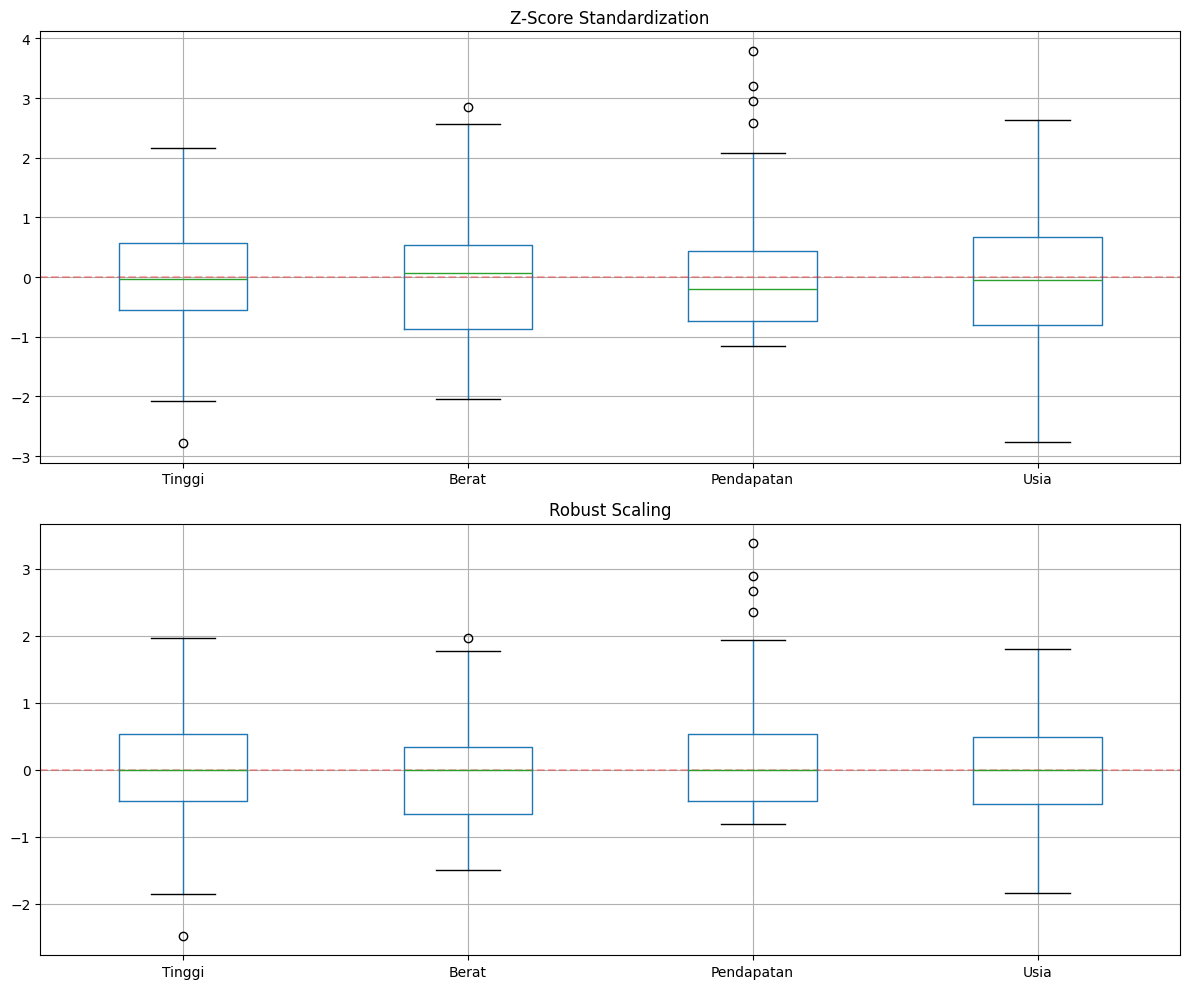


Statistik Deskriptif setelah Z-Score Standardization:
--------------------------------------------------
        Tinggi    Berat  Pendapatan     Usia
count  100.000  100.000     100.000  100.000
mean     0.000   -0.000      -0.000   -0.000
std      1.005    1.005       1.005    1.005
min     -2.784   -2.046      -1.148   -2.769
25%     -0.550   -0.873      -0.735   -0.810
50%     -0.026    0.065      -0.193   -0.043
75%      0.564    0.544       0.444    0.677
max      2.165    2.843       3.789    2.639

Statistik Deskriptif setelah Robust Scaling:
--------------------------------------------------
        Tinggi    Berat  Pendapatan     Usia
count  100.000  100.000     100.000  100.000
mean     0.023   -0.046       0.163    0.029
std      0.902    0.710       0.852    0.676
min     -2.476   -1.490      -0.811   -1.833
25%     -0.471   -0.662      -0.460   -0.515
50%      0.000    0.000      -0.000    0.000
75%      0.529    0.338       0.540    0.485
max      1.966    1.962       3.

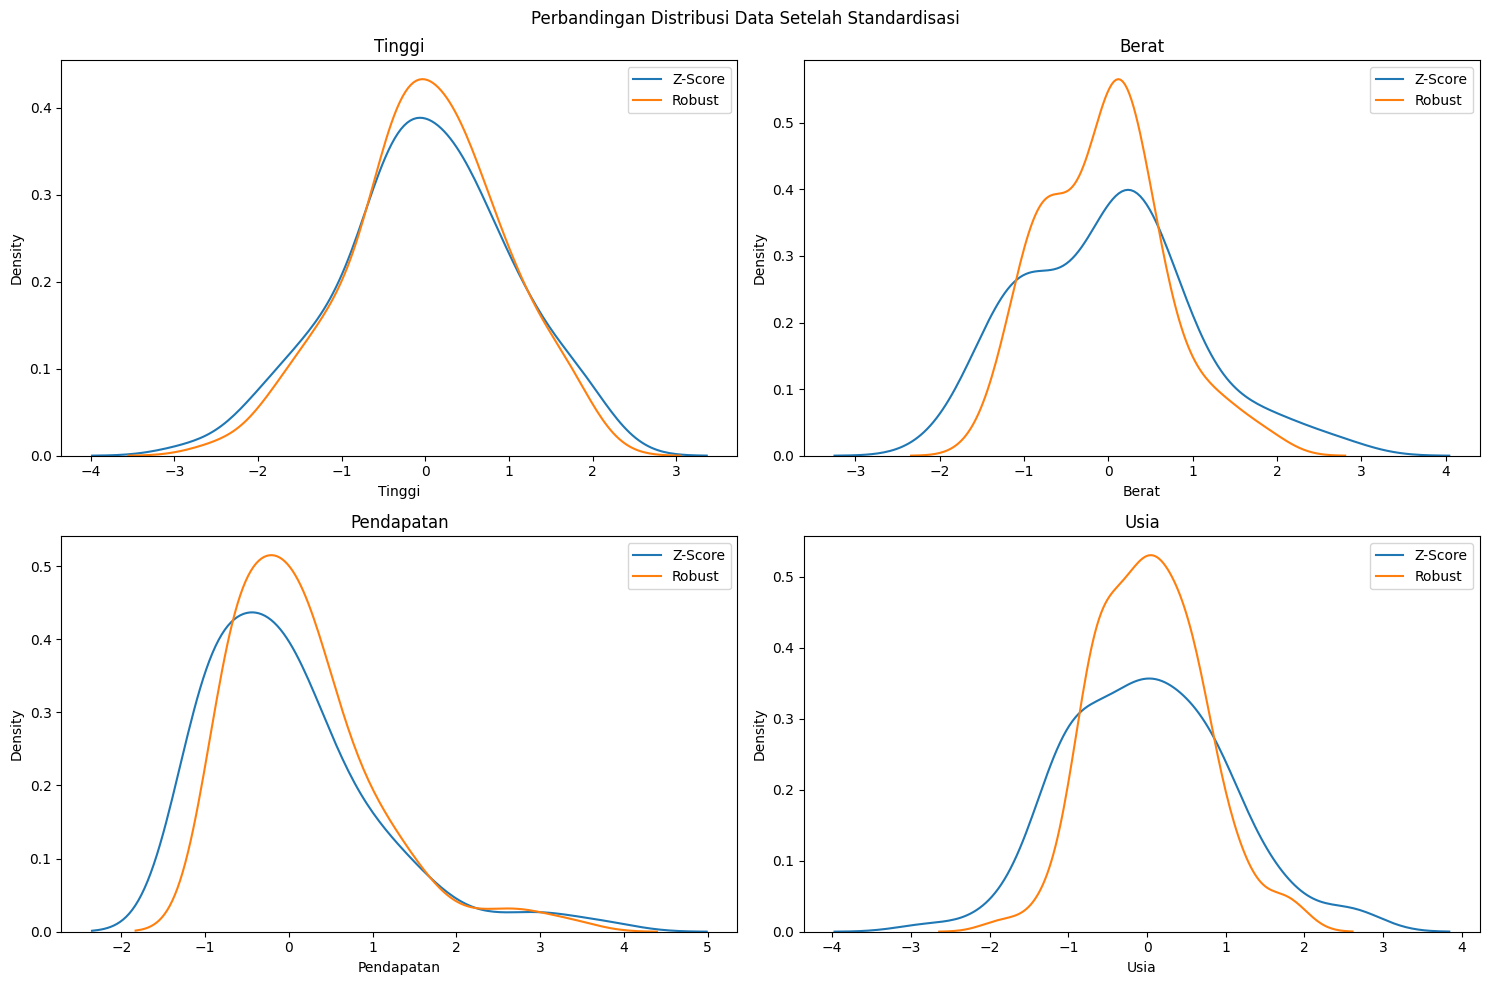

In [8]:
# 1. Z-Score Standardization
standard_scaler = StandardScaler()
df_zscore = pd.DataFrame(
    standard_scaler.fit_transform(df),
    columns=df.columns
)

# 2. Robust Scaling
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(
    robust_scaler.fit_transform(df),
    columns=df.columns
)

# Visualisasi hasil standardisasi
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot Z-Score Standardization
df_zscore.boxplot(ax=axes[0])
axes[0].set_title('Z-Score Standardization')
axes[0].axhline(y=0, color='r', linestyle='--', alpha=0.3)

# Plot Robust Scaling
df_robust.boxplot(ax=axes[1])
axes[1].set_title('Robust Scaling')
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Tampilkan statistik deskriptif hasil standardisasi
print("\nStatistik Deskriptif setelah Z-Score Standardization:")
print("-" * 50)
print(df_zscore.describe().round(3))

print("\nStatistik Deskriptif setelah Robust Scaling:")
print("-" * 50)
print(df_robust.describe().round(3))

# Visualisasi perbandingan distribusi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Perbandingan Distribusi Data Setelah Standardisasi')

for i, column in enumerate(df.columns):
    row = i // 2
    col = i % 2
    
    sns.kdeplot(data=df_zscore[column], ax=axes[row, col], label='Z-Score')
    sns.kdeplot(data=df_robust[column], ax=axes[row, col], label='Robust')
    
    axes[row, col].set_title(column)
    axes[row, col].legend()

plt.tight_layout()
plt.show()

## 4. Studi Kasus: Analisis Data Kesehatan

Mari kita terapkan teknik normalisasi dan standardisasi dalam konteks analisis data kesehatan. Kita akan:
1. Membuat dataset kesehatan yang lebih realistis
2. Membandingkan berbagai teknik scaling
3. Menganalisis pengaruh scaling terhadap outlier
4. Memilih teknik scaling yang paling sesuai

Dalam kasus ini, kita akan menggunakan data kesehatan yang mencakup:
- BMI (Body Mass Index)
- Tekanan Darah
- Gula Darah
- Kolesterol

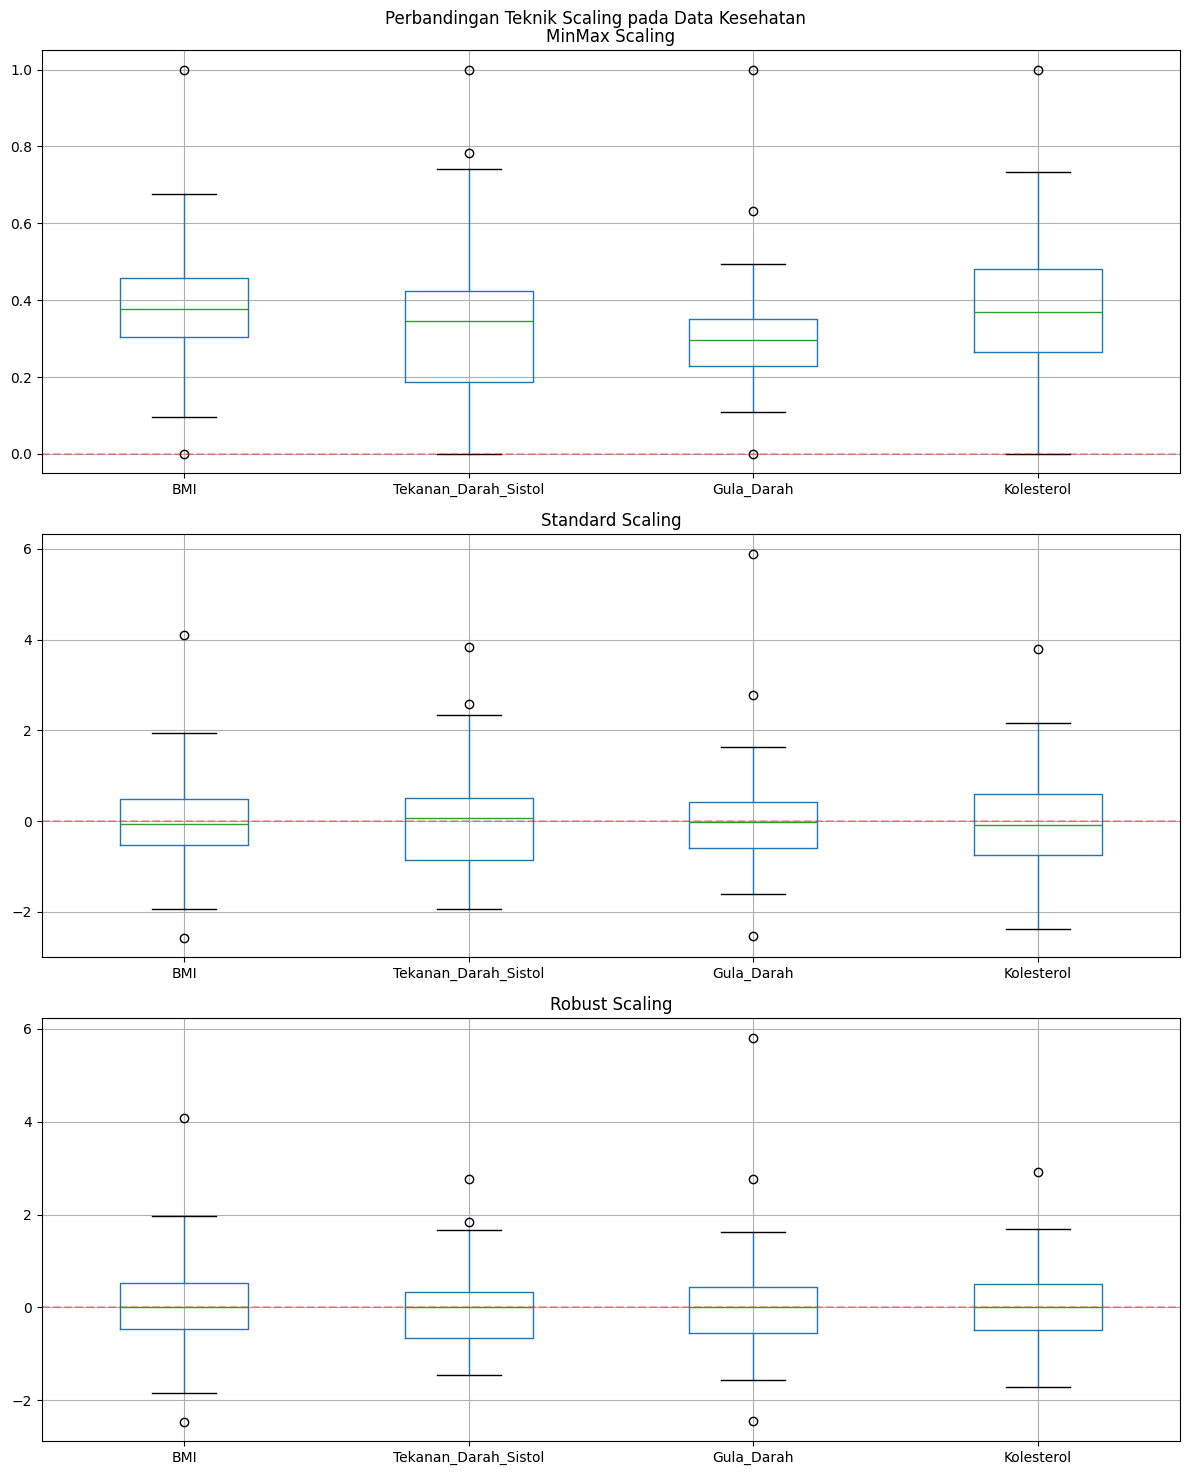

Statistik Data Asli:
--------------------------------------------------
          BMI  Tekanan_Darah_Sistol  Gula_Darah  Kolesterol
count  100.00                100.00      100.00      100.00
mean    24.66                121.00      103.35      205.53
std      4.97                 15.48       33.51       38.20
min     11.90                 91.22       18.97      115.04
25%     22.00                107.92       83.61      177.32
50%     24.37                121.90      102.44      202.01
75%     27.05                128.95      117.61      228.18
max     45.00                180.00      300.00      350.00

Statistik setelah MinMax Scaling:
--------------------------------------------------
           BMI  Tekanan_Darah_Sistol  Gula_Darah  Kolesterol
count  100.000               100.000     100.000     100.000
mean     0.385                 0.335       0.300       0.385
std      0.150                 0.174       0.119       0.163
min      0.000                 0.000       0.000       0.0

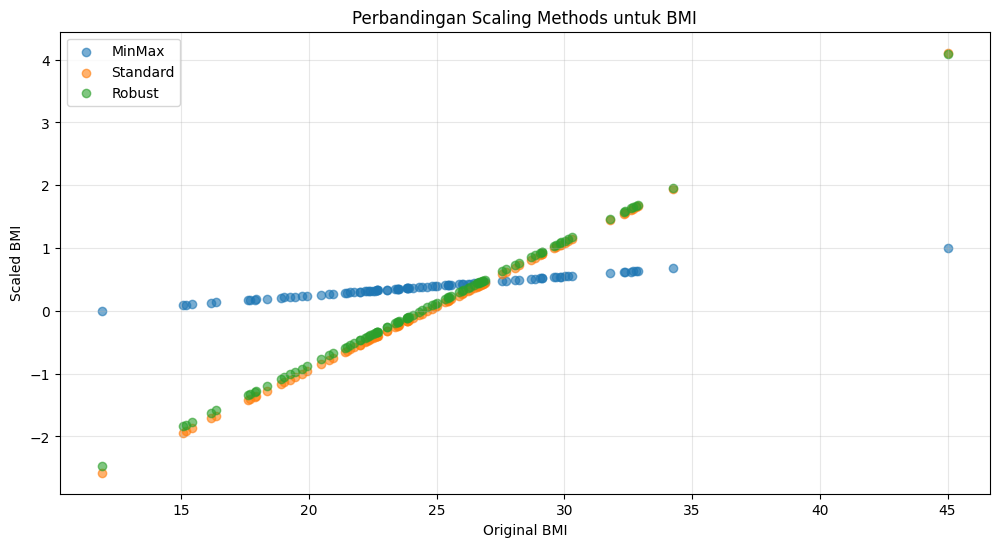

In [9]:
# Membuat dataset kesehatan
np.random.seed(42)
n_samples = 100

health_data = {
    'BMI': np.random.normal(25, 5, n_samples),  # Normal BMI: 18.5-24.9
    'Tekanan_Darah_Sistol': np.random.normal(120, 15, n_samples),  # Normal: 90-120
    'Gula_Darah': np.random.normal(100, 25, n_samples),  # Normal: 70-100
    'Kolesterol': np.random.normal(200, 40, n_samples)  # Normal: <200
}

# Tambahkan beberapa outlier
health_data['BMI'][0] = 45  # Obesitas ekstrem
health_data['Tekanan_Darah_Sistol'][1] = 180  # Hipertensi
health_data['Gula_Darah'][2] = 300  # Diabetes
health_data['Kolesterol'][3] = 350  # Kolesterol tinggi

# Buat DataFrame
df_health = pd.DataFrame(health_data)

# Terapkan berbagai teknik scaling
scalers = {
    'MinMax': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

scaled_dfs = {name: pd.DataFrame(
    scaler.fit_transform(df_health),
    columns=df_health.columns
) for name, scaler in scalers.items()}

# Visualisasi perbandingan
fig, axes = plt.subplots(len(scalers), 1, figsize=(12, 15))
fig.suptitle('Perbandingan Teknik Scaling pada Data Kesehatan')

for i, (name, df_scaled) in enumerate(scaled_dfs.items()):
    df_scaled.boxplot(ax=axes[i])
    axes[i].set_title(f'{name} Scaling')
    axes[i].axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis statistik
print("Statistik Data Asli:")
print("-" * 50)
print(df_health.describe().round(2))

for name, df_scaled in scaled_dfs.items():
    print(f"\nStatistik setelah {name} Scaling:")
    print("-" * 50)
    print(df_scaled.describe().round(3))

# Visualisasi pengaruh terhadap outlier
feature = 'BMI'  # Pilih satu fitur untuk analisis detail
plt.figure(figsize=(12, 6))

for name, df_scaled in scaled_dfs.items():
    plt.scatter(df_health[feature], df_scaled[feature], 
               label=name, alpha=0.6)

plt.xlabel(f'Original {feature}')
plt.ylabel(f'Scaled {feature}')
plt.title(f'Perbandingan Scaling Methods untuk {feature}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Latihan

Gunakan dataset kesehatan yang telah kita buat untuk menyelesaikan soal-soal berikut:

1. Implementasikan custom scaler yang mengubah data menjadi percentile rank (0-100)
2. Bandingkan performa berbagai teknik scaling dalam menangani outlier:
   - Hitung dan bandingkan sensitivitas masing-masing metode terhadap outlier
   - Visualisasikan perbandingan tersebut
3. Buat fungsi untuk memilih metode scaling terbaik berdasarkan karakteristik data:
   - Analisis distribusi data
   - Presence of outliers
   - Range of values
4. Terapkan scaling pada subset kolom tertentu saja dan bandingkan hasilnya
5. Implementasikan pipeline yang menggabungkan multiple scaling methods

Berikut adalah template kode untuk memulai latihan:

In [10]:
# Template untuk latihan

# Soal 1: Custom Percentile Rank Scaler
class PercentileRankScaler:
    def fit_transform(self, X):
        # Lengkapi kode di sini...
        pass

# Soal 2: Analisis Outlier Sensitivity
def analyze_outlier_sensitivity(data, scalers):
    # Lengkapi kode di sini...
    pass

# Soal 3: Pemilihan Metode Scaling
def select_best_scaler(data):
    # Lengkapi kode di sini...
    pass

# Soal 4: Selective Scaling
def apply_selective_scaling(data, columns_to_scale, scaler):
    # Lengkapi kode di sini...
    pass

# Soal 5: Multiple Scaling Pipeline
from sklearn.pipeline import Pipeline
def create_scaling_pipeline(data):
    # Lengkapi kode di sini...
    pass

# Jalankan fungsi-fungsi di atas dengan dataset kesehatan
# percentile_scaler = PercentileRankScaler()
# analyze_outlier_sensitivity(df_health, scalers)
# best_scaler = select_best_scaler(df_health)
# scaled_subset = apply_selective_scaling(df_health, ['BMI', 'Gula_Darah'], StandardScaler())
# pipeline = create_scaling_pipeline(df_health)